# __Hands-on with TensorFlow: Part A__

Let's see how TensorFlow works and build a deep neural network model using the MNIST dataset.

## Steps to be followed:
1. Import TensorFlow
2. Load the MNIST dataset
3. Create the model
4. Get predictions from the model
5. Apply softmax activation to the predictions
6. Define the loss function
7. Compile the model
8. Train the model
9. Evaluate the model
10. Create a probability model

## Step 1: Import TensorFlow

- Import TensorFlow and check its version


In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


2025-06-03 02:35:47.909354: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


TensorFlow version: 2.13.1


## Step 2: Load the MNIST Dataset

- Load the MNIST dataset and normalize the input data by dividing the train and test sets by 255



In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train[0] # a 28x28 array of numbers between 0 and 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
# Normalize to 1: i.e., divide by 255
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
x_train[0] # a 28x28 array of numbers vetween 0 and 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

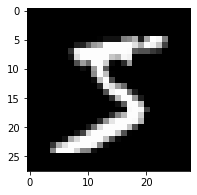

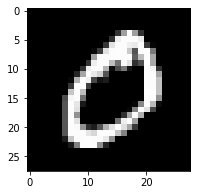

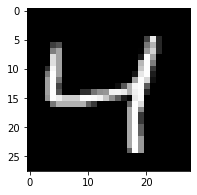

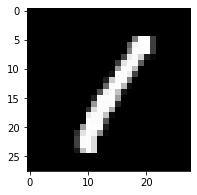

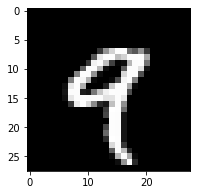

In [9]:
# Show some examples
import matplotlib.pyplot as plt
import numpy as np
n_images = 5
test_images = x_train[:n_images]

for i in range(n_images):
    plt.figure(figsize=(3,3))
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()

__Observation:__
- The dataset has been downloaded.

Remark: x_train is a three-dimensional array
- 1st dimension = sample numer
- 2nd dimension = the line of the pixel in the image
- 3rd dimension = column of the pixel in the image

Example: x[5] is image number 5

In [10]:
x_train.shape

(60000, 28, 28)

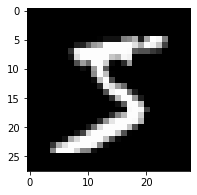

True output (target) is 5 
 



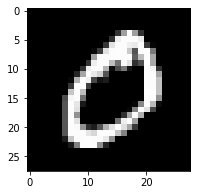

True output (target) is 0 
 



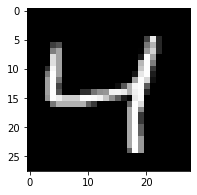

True output (target) is 4 
 



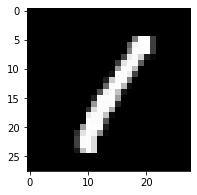

True output (target) is 1 
 



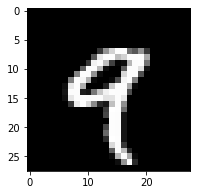

True output (target) is 9 
 



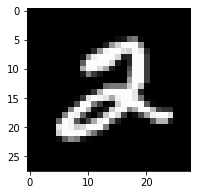

True output (target) is 2 
 



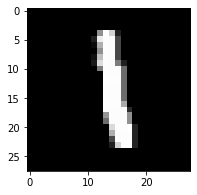

True output (target) is 1 
 



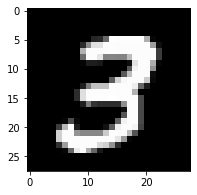

True output (target) is 3 
 



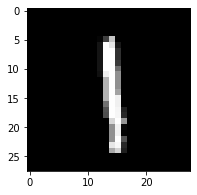

True output (target) is 1 
 



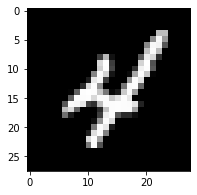

True output (target) is 4 
 



In [11]:
# Show some examples
import matplotlib.pyplot as plt
import numpy as np
n_images = 10
test_images = x_train[:n_images]

for i in range(n_images):
    plt.figure(figsize=(3,3))
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("True output (target) is", y_train[i],"\n","\n")

__Renark: The input X is the image, the target Y is the value of the digit displayed on the image.__ 

## Step 3: Create the Model

- Create a Sequential model with Flatten, Dense, and Dropout layers
- 1st layer: flatten
- 2nd layer: Dense, 128 nodes=128 outputs=128 neurons, activation = sigmoid
- 3rd layer: Dense, 64 nodes, activation = relu
- 4th layer: Dense, no activation; select the appropriate number of nodes

In [18]:
my_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # 1st layer
    tf.keras.layers.Dense(units=128, activation='sigmoid'), # 2nd layer
    tf.keras.layers.Dense(units=64, activation='relu'), # 3rd layer
    tf.keras.layers.Dense(units=10, activation=None) # 4th layer
])

In [19]:
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Step 4: Get Predictions from the Model

- Get the predictions from the model using the train data for one column, as the optimizer is not yet applied


__Renarks: the parameters (weighst and biases) are already initialized. So, you can already make (bad) predictions.__

In [20]:
# preliminary predictions (the model has not beed trained yet)
my_prediction = my_model(x_train[0:1])
my_prediction

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-0.29744366, -0.39066324, -0.6951338 ,  0.32837647, -0.17481467,
        -0.40488973, -0.44069555,  1.3780974 ,  0.19137996,  0.48205522]],
      dtype=float32)>

__Remark: we obtain 10 outputs, as expected.__

__Observation:__
- An array of predicted values is displayed.

## Step 5: Apply Softmax Activation to the Predictions

- Apply softmax activation to the predictions and print the output in terms of probabilities


In [21]:
# Compute softmax of the predictions
tf.nn.softmax(my_prediction)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.06060523, 0.05521097, 0.04071884, 0.11331835, 0.06851207,
        0.05443107, 0.05251659, 0.323734  , 0.09881057, 0.13214236]],
      dtype=float32)>

In [22]:
# Deduct category from softmax
np.argmax(tf.nn.softmax(my_prediction))

7

__The predicted digit, using the non-rtrained model, is 4.__

__Observation:__
- The predicted values in terms of probabilities are displayed as an array.

## Step 6: Define the Loss Function

- Let's create a loss function for the model.
- Next, let's define the SparseCategoricalCrossentropy loss function.


In [23]:
# Use "from_logits=True" when there is no activation in the last layer
# Use CategoricalCrossentropy when the training outputs are categories that are one-hot encoded
# Use SparseCategoricalCrossentropy when the training outputs are categories that are NOT one-hot encoded
# Here, the categories are NOT one-hot encoded; they are label encoded as 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.
#
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

__Remark: "from_logits=True" indicates that we haven't included softmax in the model. Python will apply the softmax to the output itself.__

In [24]:
y_train[:1]

array([5], dtype=uint8)

In [25]:
my_prediction

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-0.29744366, -0.39066324, -0.6951338 ,  0.32837647, -0.17481467,
        -0.40488973, -0.44069555,  1.3780974 ,  0.19137996,  0.48205522]],
      dtype=float32)>

In [26]:
# Test loss function on 1 example
loss_fn(y_train[:1], my_prediction).numpy()

2.9108205

__Remark: Python applied "softmax" to the output because we told it that "from_logits=True".__

__Observation:__
- Here,the value is 2.061.

## Step 7: Compile the Model

- Now, compile the model with the Adam optimizer, the loss function, and the accuracy metric

In [27]:
my_model.compile(optimizer = 'adam', # Adam is an improved gradient descent
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ['Accuracy']) # OPTIONAL; NOT USED FOR TRAINING; use this in case you want to see this etric later

__Display model summary__

In [28]:
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


__Observation:__
- Here, we have used an optimizer as Adam, loss as a loss function, and metrics as accuracy.

## Step 8: Train the Model

- Fit the model using the training data for 5 epochs


In [29]:
# epochs = number of iterations of the optimizer (e.g. gradient descent)
# 1 epoch = 1 iteration
my_model.fit(x_train,y_train,epochs=12)

Epoch 1/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3630 - Accuracy: 0.8972
Epoch 2/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1627 - Accuracy: 0.9517
Epoch 3/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1119 - Accuracy: 0.9661
Epoch 4/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0843 - Accuracy: 0.9743
Epoch 5/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0657 - Accuracy: 0.9793
Epoch 6/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0529 - Accuracy: 0.9837
Epoch 7/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0421 - Accuracy: 0.9867
Epoch 8/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0344 - Accuracy: 0.9895
Epoch 9/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0282 - Accuracy: 0.9910
Epoch 10/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.022

__Observations:__
- The model fits the data.
- Here, we can see that the accuracy is increased by different epochs.

## Step 9: Evaluate the Model

- Evaluate the model using the testing data and print the results


In [33]:
my_model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 774us/step - loss: 0.0916 - Accuracy: 0.9763


[0.09157928824424744, 0.9763000011444092]

__Observation:__

- The accuracy score is 0.98, and the loss is 0.08.

In [34]:
# Compute the predictions for the test set:
my_predictions = my_model(x_test)

In [35]:
my_predictions[:2]

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[ -5.619529  ,  -7.65647   ,  -5.100232  ,  -0.7210393 ,
        -11.016618  ,  -9.309326  , -23.490078  ,  13.277104  ,
         -6.827299  ,   0.34411365],
       [ -3.421251  ,   2.7694368 ,  15.622332  ,  -3.7160273 ,
        -14.878776  ,  -4.778291  ,  -6.2960987 ,  -5.22747   ,
         -5.3715067 , -14.492491  ]], dtype=float32)>

## Step 10: Create a Probability Model

- Create a probability model by adding the Softmax layer to the existing model

__We do the following because "softmax" is not included in the model.__

In [36]:
probability_model = tf.keras.Sequential([
    my_model,
    tf.keras.layers.Softmax()
])

__Remark: there is no training to be done for the "probability_model" because Softmax has no weights and "my_model" has already been trained.__

- Get the predictions using the test data

__Make predictions for all X_test__

In [37]:
my_predictions = probability_model(x_test)

In [38]:
my_predictions[:2]

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[6.2129102e-09, 8.1033130e-10, 1.0442940e-08, 8.3307066e-07,
        2.8142920e-11, 1.5518042e-10, 1.0769974e-16, 9.9999678e-01,
        1.8568067e-09, 2.4169740e-06],
       [5.3638414e-09, 2.6185305e-06, 9.9999738e-01, 3.9944399e-09,
        5.6693955e-14, 1.3807682e-09, 3.0265340e-10, 8.8113999e-10,
        7.6293988e-10, 8.3425298e-14]], dtype=float32)>

__Observation:__
- Here, we have the probabilities for the first three observations and different classes.

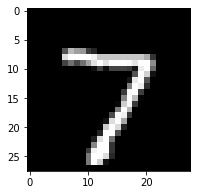

Model prediction: 7 
 



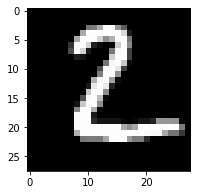

Model prediction: 2 
 



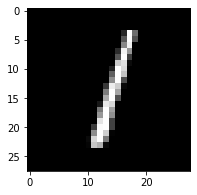

Model prediction: 1 
 



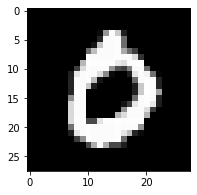

Model prediction: 0 
 



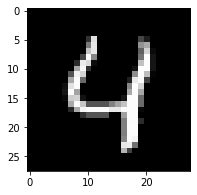

Model prediction: 4 
 



In [47]:
# Show some examples of predictions for the test set
import matplotlib.pyplot as plt
import numpy as np
n_images = 5
test_images = x_test[:n_images]
predictions = probability_model(test_images)

for i in range(n_images):
    plt.figure(figsize=(3,3))
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]),"\n","\n")

## Other way of coding the last layer of the model

- Create a Sequential model with Flatten, Dense, and Dropout layers
- 1st layer: flatten
- 2nd layer: Dense, 128 nodes=128 outputs=128 neurons, activation = sigmoid
- 3rd layer: Dense, 64 nodes, activation = relu
- 4th layer: Dense, select the appropriate number of nodes, activation=softmax

In [12]:
# Define model
my_model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # 1st layer
    tf.keras.layers.Dense(units=128, activation='sigmoid'), # 2nd layer
    tf.keras.layers.Dense(units=64, activation='relu'), # 3rd layer
    tf.keras.layers.Dense(units=10, activation='softmax') # 4th layer
])

In [11]:
my_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Compile
my_model2.compile(optimizer = 'adam',
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(), # or, equivalently, SparseCategoricalCrossentropy(from_logits = False)
                  metrics = ['Accuracy'])

In [15]:
# Train
my_model2.fit(x_train,y_train,epochs=12)

Epoch 1/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3620 - Accuracy: 0.8998
Epoch 2/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1643 - Accuracy: 0.9517
Epoch 3/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1137 - Accuracy: 0.9659
Epoch 4/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0860 - Accuracy: 0.9735
Epoch 5/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0666 - Accuracy: 0.9795
Epoch 6/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0535 - Accuracy: 0.9832
Epoch 7/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0429 - Accuracy: 0.9867
Epoch 8/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0343 - Accuracy: 0.9898
Epoch 9/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0288 - Accuracy: 0.9911
Epoch 10/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.023

In [16]:
# Evaluate
my_model2.evaluate(x_test,y_test)

313/313 [==============================] - 0s 834us/step - loss: 0.0976 - Accuracy: 0.9741


[0.0976049080491066, 0.9740999937057495]

In [40]:
# Predict
my_predictions2 = my_model2.predict(x_test)

313/313 [==============================] - 0s 735us/step


In [41]:
print(my_predictions2[0])

[2.8521438e-08 2.6548810e-09 3.2588101e-08 1.5673206e-06 1.3218302e-14
 2.4996564e-11 1.6542051e-16 9.9999833e-01 4.3453058e-10 1.5503346e-08]


In [42]:
print(np.argmax(my_predictions2[0]))

7


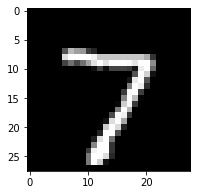

Model prediction: 7 
 



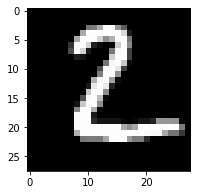

Model prediction: 2 
 



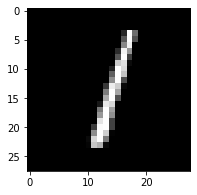

Model prediction: 1 
 



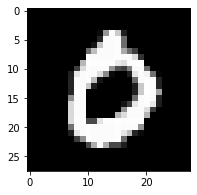

Model prediction: 0 
 



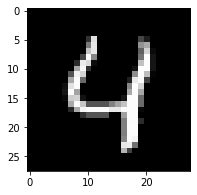

Model prediction: 4 
 



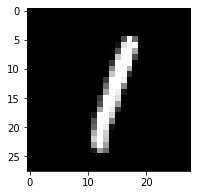

Model prediction: 1 
 



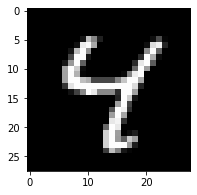

Model prediction: 4 
 



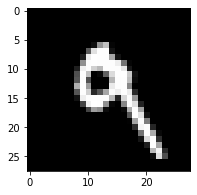

Model prediction: 9 
 



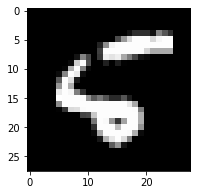

Model prediction: 5 
 



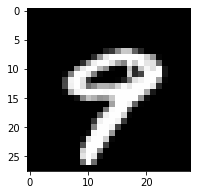

Model prediction: 9 
 



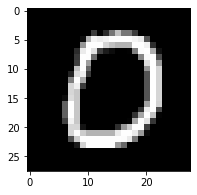

Model prediction: 0 
 



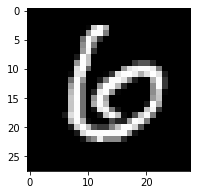

Model prediction: 6 
 



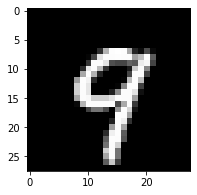

Model prediction: 9 
 



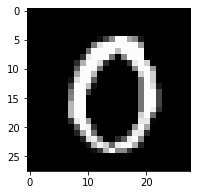

Model prediction: 0 
 



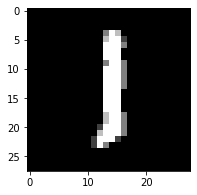

Model prediction: 1 
 



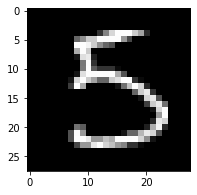

Model prediction: 5 
 



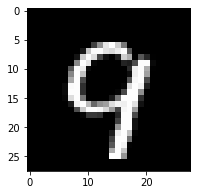

Model prediction: 9 
 



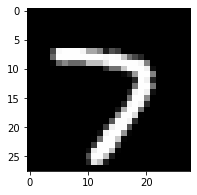

Model prediction: 7 
 



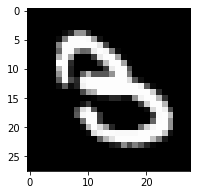

Model prediction: 3 
 



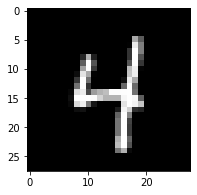

Model prediction: 4 
 



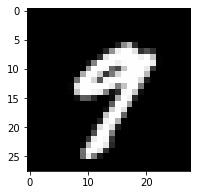

Model prediction: 9 
 



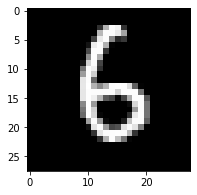

Model prediction: 6 
 



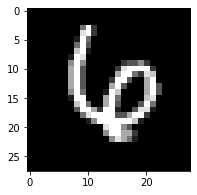

Model prediction: 6 
 



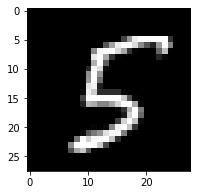

Model prediction: 5 
 



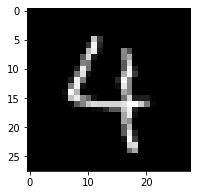

Model prediction: 4 
 



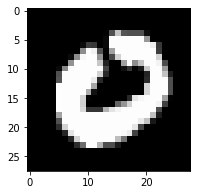

Model prediction: 0 
 



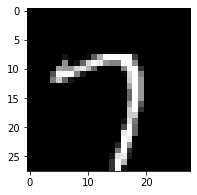

Model prediction: 7 
 



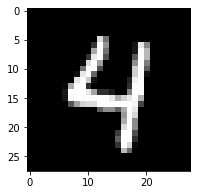

Model prediction: 4 
 



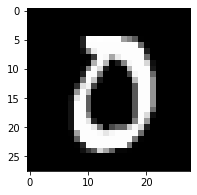

Model prediction: 0 
 



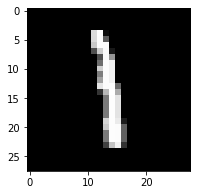

Model prediction: 1 
 



In [46]:
# Show some examples
n_images = 30
test_images = x_test[:n_images]
predictions = my_model2(test_images)

for i in range(n_images):
    plt.figure(figsize=(3,3))
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions[i]),"\n","\n")

## Store information about the training

In [48]:
# Define model
my_model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # 1st layer
    tf.keras.layers.Dense(units=128, activation='sigmoid'), # 2nd layer
    tf.keras.layers.Dense(units=64, activation='relu'), # 3rd layer
    tf.keras.layers.Dense(units=10, activation='softmax') # 4th layer
])

In [49]:
my_model2.compile(optimizer = 'adam', # Adam is an imporved gradient descent
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['Accuracy'])

In [51]:
# Train
history = my_model2.fit(x_train,y_train,epochs=12)

Epoch 1/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3520 - Accuracy: 0.9005
Epoch 2/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1628 - Accuracy: 0.9514
Epoch 3/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1140 - Accuracy: 0.9658
Epoch 4/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0850 - Accuracy: 0.9740
Epoch 5/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0664 - Accuracy: 0.9792
Epoch 6/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0525 - Accuracy: 0.9839
Epoch 7/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0416 - Accuracy: 0.9865
Epoch 8/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0343 - Accuracy: 0.9889
Epoch 9/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0257 - Accuracy: 0.9918
Epoch 10/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.022

In [53]:
history.history

{'loss': [0.3519708514213562,
  0.16282503306865692,
  0.11396286636590958,
  0.0849735289812088,
  0.06637208163738251,
  0.052518267184495926,
  0.04164443537592888,
  0.03426707535982132,
  0.025680404156446457,
  0.022350681945681572,
  0.018601542338728905,
  0.015187272801995277],
 'Accuracy': [0.9004999995231628,
  0.9514333605766296,
  0.9657999873161316,
  0.973966658115387,
  0.9792166948318481,
  0.9838833212852478,
  0.9865333437919617,
  0.9889333248138428,
  0.9917500019073486,
  0.9928833246231079,
  0.9940833449363708,
  0.995033323764801]}

In [54]:
history.history['loss']

[0.3519708514213562,
 0.16282503306865692,
 0.11396286636590958,
 0.0849735289812088,
 0.06637208163738251,
 0.052518267184495926,
 0.04164443537592888,
 0.03426707535982132,
 0.025680404156446457,
 0.022350681945681572,
 0.018601542338728905,
 0.015187272801995277]

In [56]:
history.history['Accuracy']

[0.9004999995231628,
 0.9514333605766296,
 0.9657999873161316,
 0.973966658115387,
 0.9792166948318481,
 0.9838833212852478,
 0.9865333437919617,
 0.9889333248138428,
 0.9917500019073486,
 0.9928833246231079,
 0.9940833449363708,
 0.995033323764801]

In [57]:
import matplotlib.pyplot as plt
def plotModelHistory (h):
  fig, ax = plt.subplots(1 , 2, figsize =(15 , 4))
  ax[0].plot(h.history['loss'])
  ax[0].title.set_text("Train loss")
  ax[1].plot(h.history['Accuracy' ])
  ax[1].legend(['accuracy'])
  ax[1].title.set_text("Train accuracy")
  print("Max.Training Accuracy",max(h. history['Accuracy']))

Max.Training Accuracy 0.995033323764801


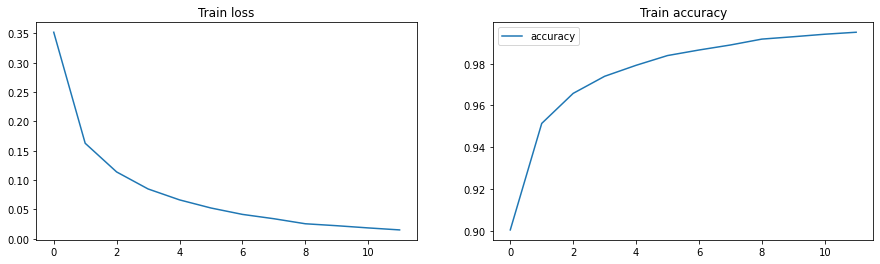

In [58]:
plotModelHistory(history)

## We can use a validation set to check for overfitting

In [59]:
# Define model
my_model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # 1st layer
    tf.keras.layers.Dense(units=128, activation='sigmoid'), # 2nd layer
    tf.keras.layers.Dense(units=64, activation='relu'), # 3rd layer
    tf.keras.layers.Dense(units=10, activation='softmax') # 4th layer
])

# Compile
my_model2.compile(optimizer = 'adam', # Adam is an imporved gradient descent
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['Accuracy'])

In [60]:
# Train using a validation split of 10%
history = my_model2.fit(x_train,y_train,validation_split=.1,epochs=12)

Epoch 1/12
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3707 - Accuracy: 0.8946 - val_loss: 0.1674 - val_Accuracy: 0.9537
Epoch 2/12
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1671 - Accuracy: 0.9491 - val_loss: 0.1239 - val_Accuracy: 0.9650
Epoch 3/12
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1179 - Accuracy: 0.9638 - val_loss: 0.0951 - val_Accuracy: 0.9712
Epoch 4/12
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0884 - Accuracy: 0.9725 - val_loss: 0.0891 - val_Accuracy: 0.9730
Epoch 5/12
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0679 - Accuracy: 0.9793 - val_loss: 0.0838 - val_Accuracy: 0.9742
Epoch 6/12
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0531 - Accuracy: 0.9834 - val_loss: 0.0864 - val_Accuracy: 0.9743
Epoch 7/12
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0438 - Accuracy: 0.9860 - val_loss: 0.0755 - val_Accuracy:

In [61]:
history.history

{'loss': [0.370716392993927,
  0.16705507040023804,
  0.11785240471363068,
  0.0883772149682045,
  0.06788509339094162,
  0.053101796656847,
  0.043821778148412704,
  0.03477418050169945,
  0.027218876406550407,
  0.022451983764767647,
  0.019296323880553246,
  0.015844974666833878],
 'Accuracy': [0.894611120223999,
  0.9490925669670105,
  0.9637592434883118,
  0.9725185036659241,
  0.9792592525482178,
  0.9833889007568359,
  0.9859814643859863,
  0.9891296029090881,
  0.9917407631874084,
  0.9934259057044983,
  0.9932963252067566,
  0.9948148131370544],
 'val_loss': [0.1673993468284607,
  0.1239294707775116,
  0.09511543065309525,
  0.08910372108221054,
  0.08384875953197479,
  0.08637339621782303,
  0.07545414566993713,
  0.08475934714078903,
  0.07891808450222015,
  0.09065522998571396,
  0.08685601502656937,
  0.08949649333953857],
 'val_Accuracy': [0.9536666870117188,
  0.9649999737739563,
  0.9711666703224182,
  0.9729999899864197,
  0.9741666913032532,
  0.9743333458900452,
  0.

In [18]:
import matplotlib.pyplot as plt
def plotModelHistory (h):
  fig, ax = plt.subplots(1 , 2, figsize =(15 , 4))
  ax[0].plot(h.history['loss'])
  ax[0].plot (h.history['val_loss'])
  ax[0].legend(['loss','val_loss'])
  ax[0].title.set_text("Train loss vs Validation loss")
  ax[1].plot(h.history['Accuracy' ])
  ax[1].plot(h.history['val_Accuracy'])
  ax[1].legend(['accuracy','val_accuracy'])
  ax[1].title.set_text("Train accuracy vs Validation accuracy")
  print("Max.Training Accuracy",max(h. history['Accuracy']))
  print("Max.Validation Accuracy",max(h.history['val_Accuracy']))

Max.Training Accuracy 0.9948148131370544
Max.Validaiton Accuracy 0.9804999828338623


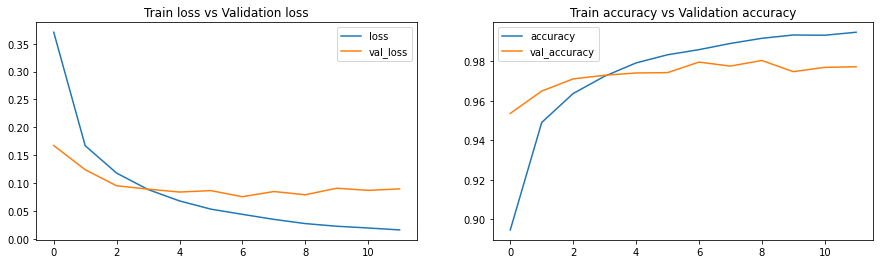

In [63]:
plotModelHistory(history)

__Conclusion: the train accuracy and validation accuracy as similarly high (97%-99%): there no sign of overfitting.__

## Using dropout regularization

- Create a Sequential model with Flatten, Dense, and Dropout layers
- 1st layer: flatten
- 2nd layer: Dense, 128 nodes=128 outputs=128 neurons, activation = sigmoid
- 3rd layer: Dropout regularization of the second layer with a proportion of 0.2 (20%)
- 4th layer: Dense, 64 nodes, activation = relu
- 5th layer: Dense, select the appropriate number of nodes, activation=softmax

In [11]:
# Define model
my_model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # 1st layer
    tf.keras.layers.Dense(units=128, activation='sigmoid'), # 2nd layer
    tf.keras.layers.Dropout(rate=0.2), # 3rd layer
    tf.keras.layers.Dense(units=64, activation='relu'), # 4th layer
    tf.keras.layers.Dense(units=10, activation='softmax') # 5th layer
])

In [12]:
my_model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Compile
my_model3.compile(optimizer = 'adam', # Adam is an imporved gradient descent
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['Accuracy'])

In [14]:
# Train using a validation split of 10%
history3 = my_model3.fit(x_train,y_train,validation_split=.1,epochs=12)

Epoch 1/12
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4421 - Accuracy: 0.8701 - val_loss: 0.1865 - val_Accuracy: 0.9485
Epoch 2/12
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2157 - Accuracy: 0.9355 - val_loss: 0.1290 - val_Accuracy: 0.9660
Epoch 3/12
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1558 - Accuracy: 0.9530 - val_loss: 0.1069 - val_Accuracy: 0.9705
Epoch 4/12
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1263 - Accuracy: 0.9621 - val_loss: 0.0881 - val_Accuracy: 0.9752
Epoch 5/12
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1039 - Accuracy: 0.9673 - val_loss: 0.0808 - val_Accuracy: 0.9777
Epoch 6/12
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0893 - Accuracy: 0.9716 - val_loss: 0.0763 - val_Accuracy: 0.9783
Epoch 7/12
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0803 - Accuracy: 0.9742 - val_loss: 0.0753 - val_Accuracy:

Max.Training Accuracy 0.9838518500328064
Max.Validation Accuracy 0.9800000190734863


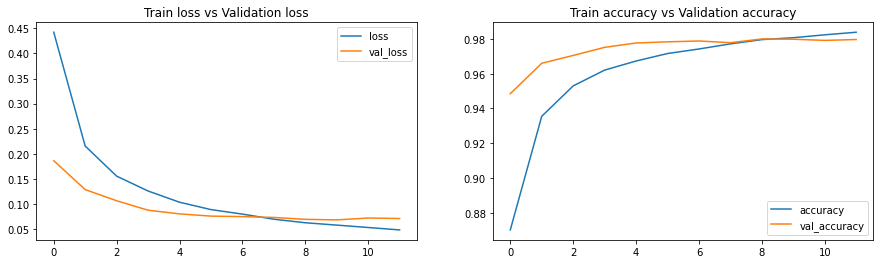

In [19]:
plotModelHistory(history3)